# ST3189 Assignment 1

## Question 1

1. Consider polynomial regression models for the target variable ‘mpg’ based on
the input variable horsepower. Train these models and provide plots to depict
the fit of them on the training data. 

### Importing relevant packages

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

#### Loading Data

In [33]:
auto = pd.read_csv("Auto.csv")

In [34]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [46]:
auto['horsepower'] = auto['horsepower'].astype(int)
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model year'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

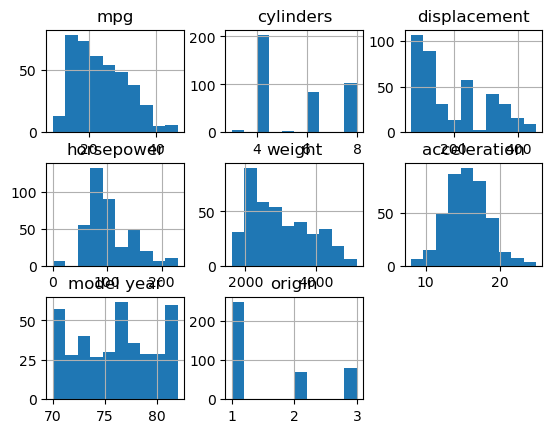

In [47]:
auto.hist()

In [107]:
auto_sorted= auto.sort_values('horsepower')
auto_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 126 to 116
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.5+ KB


In [108]:
X = auto_sorted['horsepower'].values.reshape(-1,1)
y = auto_sorted['mpg'].values.reshape(-1,1)

In [109]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin)

In [110]:
poly_features = PolynomialFeatures(degree = 2)
X_poly = poly_features.fit_transform(X)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
y_pred_poly = lin_reg_poly.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

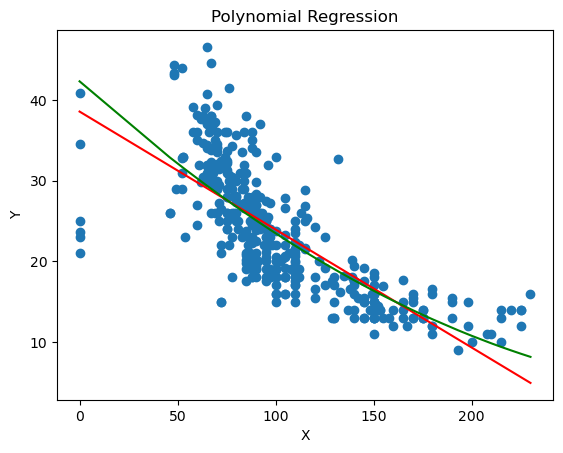

In [111]:
plt.scatter(X, y)
plt.plot(X, y_pred_lin, color='red')
plt.plot(X, y_pred_poly, color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [112]:
print("MSE Linear Regression:", mse_lin)
print("MSE Polynomial Regression (degree 2):", mse_poly)

MSE Linear Regression: 26.26757553656264
MSE Polynomial Regression (degree 2): 25.723721846909697


## Question 2

2. Compare polynomial regression models of different order and identify the best
among them in terms of test error. Use cross-validation for the estimation of the
test error. 

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin)

In [ ]:
poly_features = PolynomialFeatures(degree = 2)
X_poly = poly_features.fit_transform(X)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
y_pred_poly = lin_reg_poly.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)

In [94]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [113]:
degrees = [1,2,3,9]
cv_scores = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    scores = -1 * cross_val_score(lin_reg, X_poly, y, cv=3, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

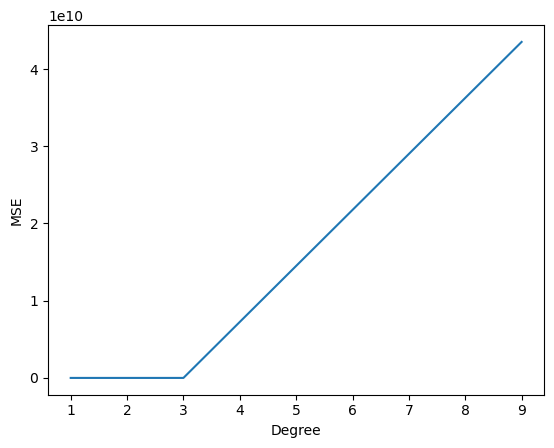

In [114]:
plt.plot(degrees, cv_scores)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()

The best degree for polynomial regression is 1.
